# Лекция 2: Монетаристская теория уровней цен

In [1]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

## Overview

Воспользуемся линейной алгеброй для объяснения, а затем проведем некоторые эксперименты с «монетаристской теорией уровней цен».

Экономисты называют ее «монетарной» или «монетаристской» теорией уровня цен, поскольку влияние на уровень цен происходит посредством решений центрального банка о печатании денежной массы.

- фискальная политика правительства определяет, превышают ли его *расходы* его *налоговые поступления*;
- Если расходы превышают поступления от налогов, правительство может поручить центральному банку покрыть разницу за счет *печатания денег*;  
- что приводит к влиянию на уровень цен, поскольку траектория уровня цен корректируется, чтобы уравнять предложение денег со спросом на деньги.  


Такая теория уровней цен была описана Томасом Сарджентом и Нилом Уоллесом в главе 5 книги
[[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)], которая представляет собой перепечатку статьи Федерального резервного банка Миннеаполиса 1981 года под названием «Неприятная монетаристская арифметика».

Иногда эту теорию также называют «фискальной теорией уровней цен», чтобы подчеркнуть важность фискального дефицита в формировании изменений в денежной массе.

Теория была расширена, подвергнута критике и применена Джоном Кокрэйном [[Cochrane, 2023](https://intro.quantecon.org/zreferences.html#id14)].

Согласно этой теории, когда правительство постоянно тратит больше, чем собирает в виде налогов, и печатает деньги для финансирования дефицита («дефицит» называется «государственным дефицитом»), это оказывает повышательное давление на уровень цен и порождает постоянную инфляцию.

«Монетаристская» или «фискальная теория уровней цен» утверждает, что

- Чтобы начать устойчивую инфляцию, правительство начинает постоянно поддерживать государственный дефицит, финансируемый деньгами.
- Чтобы остановить устойчивую инфляцию, правительство прекращает постоянное финансируемое деньгами государственное дефицитное финансирование.

Модель в этой лекции представляет собой версию модели «рациональных ожиданий» (или «совершенного предвидения»), которую Филип Кейган [[Cagan, 1956](https://intro.quantecon.org/zreferences.html#id112)] использовал для изучения денежной динамики гиперинфляции.

В то время как Кейган не использовал версию модели «рациональных ожиданий», Томас Сарджент [[Sargent, 1982](https://intro.quantecon.org/zreferences.html#id15)] ее использовал, когда изучал последствия четырех крупных инфляций в Европе после Первой мировой войны.

Некоторые из наших количественных экспериментов с версией модели рациональных ожиданий призваны проиллюстрировать, как фискальная теория объясняет внезапное прекращение столь значительной инфляции.

В этих экспериментах мы столкнемся со случаем «дивиденда скорости», который иногда сопровождал успешные программы стабилизации инфляции.

Чтобы облегчить использование линейной матричной алгебры в качестве нашего основного математического инструмента, мы воспользуемся версией модели с конечным горизонтом.

Нашими математическими инструментами являются умножение матриц и обращение матриц.

## Структура модели

Модель состоит из

* функции, которая выражает спрос на реальные остатки государственных печатных денег как обратную функцию ожидаемого уровня инфляции среди населения
* экзогенная последовательность темпов роста денежной массы. Денежная масса растёт, потому что правительство печатает её для оплаты товаров и услуг.
* условие равновесия, которое уравнивает спрос на деньги с их предложением
* предположение «совершенного предвидения» о том, что ожидаемый населением уровень инфляции равен фактическому уровню инфляции.

Чтобы представить модель формально, пусть

- $m_t$ --- логарифм номинальной денежной массы;  
- $\mu_t = m_{t+1} - m_t$ --- чистый прирост номинальной массы;  
- $p_t$ логарифм уровней цен;  
- $\pi_t = p_{t+1} - p_t$ --- инфляция между $t$ и $t+1$;  
- $\pi_t^*$ --- ожидаемый уровень инфляции между $t$ и $t+1$;  
- $T$ --- горизонт, то есть последний момент, для которого определено $p_t$;
- $\pi_{T+1}^*$ --- итоговый темп инфляции между $T$ и $T+1$.  


Спрос на реальную денежную массу $\exp\left(m_t^d - p_t\right)$ определяется функцией спроса Кейгана

<a id='equation-eq-caganmd'></a>
$$
m_t^d - p_t = -\alpha \pi_t^* \: , \: \alpha > 0 ; \quad t = 0, 1, \ldots, T . \tag{15.1}
$$

Это уравнение утверждает, что спрос на реальные остатки обратно пропорционален ожидаемому общественностью уровню инфляции с чувствительностью $\alpha$.

Решив задачу прогнозирования, люди каким-то образом обретают **идеальное предвидение**
<a id='equation-eq-ree'></a>
$$
\pi_t^* = \pi_t, \forall t \tag{15.2}
$$

в то время как приравнивание спроса на деньги к предложению позволяет нам установить $m_t^d = m_t, \quad \forall t \geq 0$.

Тогда из предыдущих уравнений следует, что

<a id='equation-eq-cagan'></a>
$$
m_t - p_t = -\alpha(p_{t+1} - p_t) \tag{15.3}
$$

Для понимания последствий совершенного предвидения, мы вычитаем уравнение [(15.3)](#equation-eq-cagan) в момент времени $t$ из того же уравнения в момент $t+1$ и получаем
$$
\mu_t - \pi_t = -\alpha \pi_{t+1} + \alpha \pi_t ,
$$
которое можно переписать в виде впередсмотрящего разностного уравнения
$$
\pi_t = \frac{\alpha}{1+\alpha} \pi_{t+1} + \frac{1}{1+\alpha} \mu_t , \quad t= 0, 1, \ldots , T
$$
где $0 < \frac{\alpha}{1+\alpha} < 1$.

Введя параметр $\delta = \frac{\alpha}{1+\alpha}$, это выражение можно переписать в виде
$$
\pi_t = \delta \pi_{t+1} + (1-\delta) \mu_t , \quad t =0, 1, \ldots, T
$$
получив систему из $T+1$ уравнения
<a id='equation-eq-pieq'></a>
$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & -\delta & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
\begin{bmatrix} \pi_0 \cr \pi_1 \cr \pi_2 \cr \vdots \cr \pi_{T-1} \cr \pi_T 
\end{bmatrix} 
= (1 - \delta) \begin{bmatrix} 
\mu_0 \cr \mu_1 \cr \mu_2 \cr \vdots \cr \mu_{T-1} \cr \mu_T
\end{bmatrix}
+ \begin{bmatrix} 
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta \pi_{T+1}^*
\end{bmatrix} \tag{15.4}
$$

Умножив обе части уравнения [(15.4)](#equation-eq-pieq) на обратную матрицу
$$
\begin{bmatrix} 1 & \delta & \delta^2 & \delta^3 & \cdots & \delta^{T-1} & \delta^T \\
                0 & 1 & \delta & \delta^2 & \cdots & \delta^{T-2} & \delta^{T-1} \\
                0 & 0 & 1 & \delta & \cdots & \delta^{T-3} & \delta^{T-2} \\
                \vdots & \vdots & \vdots & \vdots & \vdots & \delta & \delta^2 \\
                0 & 0 & 0 & 0 & \cdots & 1 & \delta \\
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
$$
мы можем получить
$$
\pi \equiv \begin{bmatrix} \pi_0 \cr \pi_1 \cr \pi_2 \cr \vdots \cr \pi_{T-1} \cr \pi_T 
\end{bmatrix}
$$

Оказывается
<a id='equation-eq-fisctheory1'></a>
$$
\pi_t = (1-\delta) \sum_{s=t}^T \delta^{s-t} \mu_s + \delta^{T+1-t} \pi_{T+1}^* \tag{15.5}
$$

Следующие уравнения
$$
m_{t+1} = m_t + \mu_t , \quad t = 0, 1, \ldots, T
$$
представимы в виде матричного уравнения
<a id='equation-eq-eq101'></a>
$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \cr
-1 & 1 & 0 & \cdots & 0 & 0 \cr
0 & -1 & 1 & \cdots & 0 & 0 \cr
\vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
0 & 0 & 0 & \cdots & 1 & 0 \cr
0 & 0 & 0 & \cdots & -1 & 1 
\end{bmatrix}
\begin{bmatrix} 
m_1 \cr m_2 \cr m_3 \cr \vdots \cr m_T \cr m_{T+1}
\end{bmatrix}
= \begin{bmatrix} 
\mu_0 \cr \mu_1 \cr \mu_2 \cr \vdots \cr \mu_{T-1} \cr \mu_T
\end{bmatrix}
+ \begin{bmatrix} 
m_0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix} \tag{15.6}
$$

Умножение обеих частей уравнения [(15.6)](#equation-eq-eq101) на матрицу, обратную левой, даст
<a id='equation-eq-mcum'></a>
$$
m_t = m_0 + \sum_{s=0}^{t-1} \mu_s, \quad t =1, \ldots, T+1 \tag{15.7}
$$

Уравнение [(15.7)](#equation-eq-mcum) показывает, что логарифм денежной массы в момент $t$ равен логарифму первоначальной денежной массы $m_0$ плюс накопление темпов роста денежной массы между моментами $0$ и $T$.

## Последующие значения

Чтобы определить уровень дальнейшей инфляции $\pi_{T+1}^*$ применим следующую версию уравнения [(15.5)](#equation-eq-fisctheory1) в момент $t = T+1$:
<a id='equation-eq-fisctheory2'></a>
$$
\pi_t = (1-\delta) \sum_{s=t}^\infty \delta^{s-t} \mu_s, \tag{15.8}
$$

и предполагая следующее знаение для $\mu_t$ равным
$$
\mu_{t+1} = \gamma^* \mu_t, \quad t \geq T.
$$

Подставляя это выражение в уравнение [(15.8)](#equation-eq-fisctheory2) в момент $t = T+1$, получим
<a id='equation-eq-piterm'></a>
$$
\begin{aligned}
\pi_{T+1}^* = \pi_{T+1} & = (1-\delta) \sum_{s=T+1}^\infty \delta^{s-t} \mu_s = \\
& = (1-\delta) \sum_{s=T+1}^\infty \delta^{s-T-1} {\gamma^*}^{s-T-1} \mu_T = \\
& = \frac{1 - \delta}{1 - \delta \gamma^*} \gamma^* \mu_T \tag{15.9}
\end{aligned}
$$
нам нужно, чтобы $\vert \gamma^* \delta \vert < 1$.

Создадим объект типа \<\<именованный кортеж\>\> для хранения параметров модели.

In [2]:
CaganREE = namedtuple(
    "CaganREE",
    [
        "m0",
        "mu_seq",
        "alpha",
        "delta",
        "pi_end",
    ],
)


def create_cagan_model(m0=1, alpha=5, mu_seq=None):
    delta = alpha / (1 + alpha)
    pi_end = mu_seq[-1] if mu_seq is not None else None
    return CaganREE(m0, mu_seq, alpha, delta, pi_end)

### Логарифм уровня цен

Мы можем использовать уравнения [(15.1)](#equation-eq-caganmd) и [(15.2)](#equation-eq-ree)
чтобы показать, что
<a id='equation-eq-pformula2'></a>
$$
p_t = m_t + \alpha \pi_t \tag{15.10}
$$
или с использованием [(15.5)](#equation-eq-fisctheory1),
<a id='equation-eq-pfiscaltheory2'></a>
$$
p_t = m_t + \alpha \left[ (1-\delta) \sum_{s=t}^T \delta^{s-t} \mu_s + \delta^{T+1-t} \pi_{T+1}^* \right] \tag{15.11}
$$

Изучим, как «неожиданное» постоянное изменение в росте денежной массы, которое ранее было совершенно непредвиденным, повлияет на динамику системы.

В момент $T_1$ когда происходит «неожиданное» изменение темпов роста денежной массы, чтобы удовлетворить уравнению [(15.10)](#equation-eq-pformula2), логарифм реальной массы идет *вверх*, тогда как $\pi_t$ идет *вниз*.

Но что именно в $m_t - p_t$ прыгает: $m_{T_1}$ или $p_{T_1}$?

Тперь мы знаем все для численного решения наше модели.

In [ ]:
def solve(model, T):
    m0, pi_end, mu_seq, alpha, delta = (
        model.m0,
        model.pi_end,
        model.mu_seq,
        model.alpha,
        model.delta,
    )

    # Create matrix representation above
    A1 = np.eye(T + 1, T + 1) - delta * np.eye(T + 1, T + 1, k=1)
    A2 = np.eye(T + 1, T + 1) - np.eye(T + 1, T + 1, k=-1)

    b1 = (1 - delta) * mu_seq + np.concatenate([np.zeros(T), [delta * pi_end]])
    b2 = mu_seq + np.concatenate([[m0], np.zeros(T)])

    pi_seq = np.linalg.solve(A1, b1)
    m_seq = np.linalg.solve(A2, b2)

    pi_seq = np.append(pi_seq, pi_end)
    m_seq = np.append(m0, m_seq)

    p_seq = m_seq + alpha * pi_seq

    return pi_seq, m_seq, p_seq

### Что прыгает?

Если мы фиксируем значение $m_{T_1}$, то формула [(15.10)](#equation-eq-pformula2) говорит нам о том, что уровень цен пойдт вниз в момнет времени $T_1$, для соответствия падению $\pi_{T_1}$.

Альтернативой этому является такое изменение денежной массы, которое позволит сохранить цены постоянными
<a id='equation-eq-eqnmoneyjump'></a>
$$
m_{T_1}^2 - m_{T_1}^1 = \alpha (\pi_{T_1}^1 - \pi_{T_1}^2), \tag{15.12}
$$

Если позволить денежной массе изменяться согласно [(15.12)](#equation-eq-eqnmoneyjump), то денежные власти не позволят ценам обрушиться в момент неожиданной стабилизации.

В литературе такой скачок [(15.12)](#equation-eq-eqnmoneyjump) называют «дивидендом скорости».

#### Технические детали скачка $p$ или $m$

Мы отметили, что при постоянной ожидаемой последовательности $\mu_s = \bar \mu$ для $s\geq t$, $\pi_{t} =\bar{\mu}$.

Следствием этого является то, что в момент $T_1$ должно поменяться или $m$, или $p$.

#### $m_{T_{1}}$ не меняется

$$
\begin{aligned}
m_{T_{1}}&=m_{T_{1}-1}+\mu_{0}\\\pi_{T_{1}}&=\mu^{*}\\p_{T_{1}}&=m_{T_{1}}+\alpha\pi_{T_{1}}
\end{aligned}
$$

Просто соедините последовательности $t\leq T_1$ и $t > T_1$.

#### $m_{T_{1}}$ меняется

Мы меняем $m_{T_{1}}$ так, что $p_{T_{1}}=\left(m_{T_{1}-1}+\mu_{0}\right)+\alpha\mu_{0}$ при $\pi_{T_{1}}=\mu^{*}$.

Тогда,

$$
m_{T_{1}}=p_{T_{1}}-\alpha\pi_{T_{1}}=\left(m_{T_{1}-1}+\mu_{0}\right)+\alpha\left(\mu_{0}-\mu^{*}\right)
$$

Мы пересчитываем $T-T_{1}$ моментов времени для $\mu_{s}=\mu^{*},\forall s\geq T_{1}$ и начального значения $m_{T_{1}}$, полученного из предыдущей формулы.

## Эксперименты

### Эксперимент 1: предвиденная резкая стабилизация

В этом эксперименте мы посмотрим, как при $\alpha > 0$ ожидаемая стабилизация инфляции оказывает влияние на предшествующую ей инфляцию.

Рассмотрим ситуацию, в которой темп роста денежной массы составляет $\mu_0$
от $t=0$ до $t=T_1$, а затем уменьшается до $\mu^*$ в момент времени $t=T_1$.

Пусть $T_1 \in (0, T)$.

Предположим, что $\mu_0 > \mu^*$ и
$$
\mu_{t+1} = \begin{cases}
    \mu_0  , & t = 0, \ldots, T_1 -1 \\
     \mu^* , & t \geq T_1
     \end{cases}
$$

Начнём с ситуации, в которой правительство реализует *предвиденное* внезапное постоянное снижение темпов создания денег в момент времени $T_1$.

Давайте поэкспериментируем со следующими параметрами:

In [4]:
T1 = 60
mu0 = 0.5
mu_star = 0
T = 80

mu_seq_1 = np.append(mu0 * np.ones(T1 + 1), mu_star * np.ones(T - T1))

cm = create_cagan_model(mu_seq=mu_seq_1)

# solve the model
pi_seq_1, m_seq_1, p_seq_1 = solve(cm, T)

Напишем функцию для отображения графиков

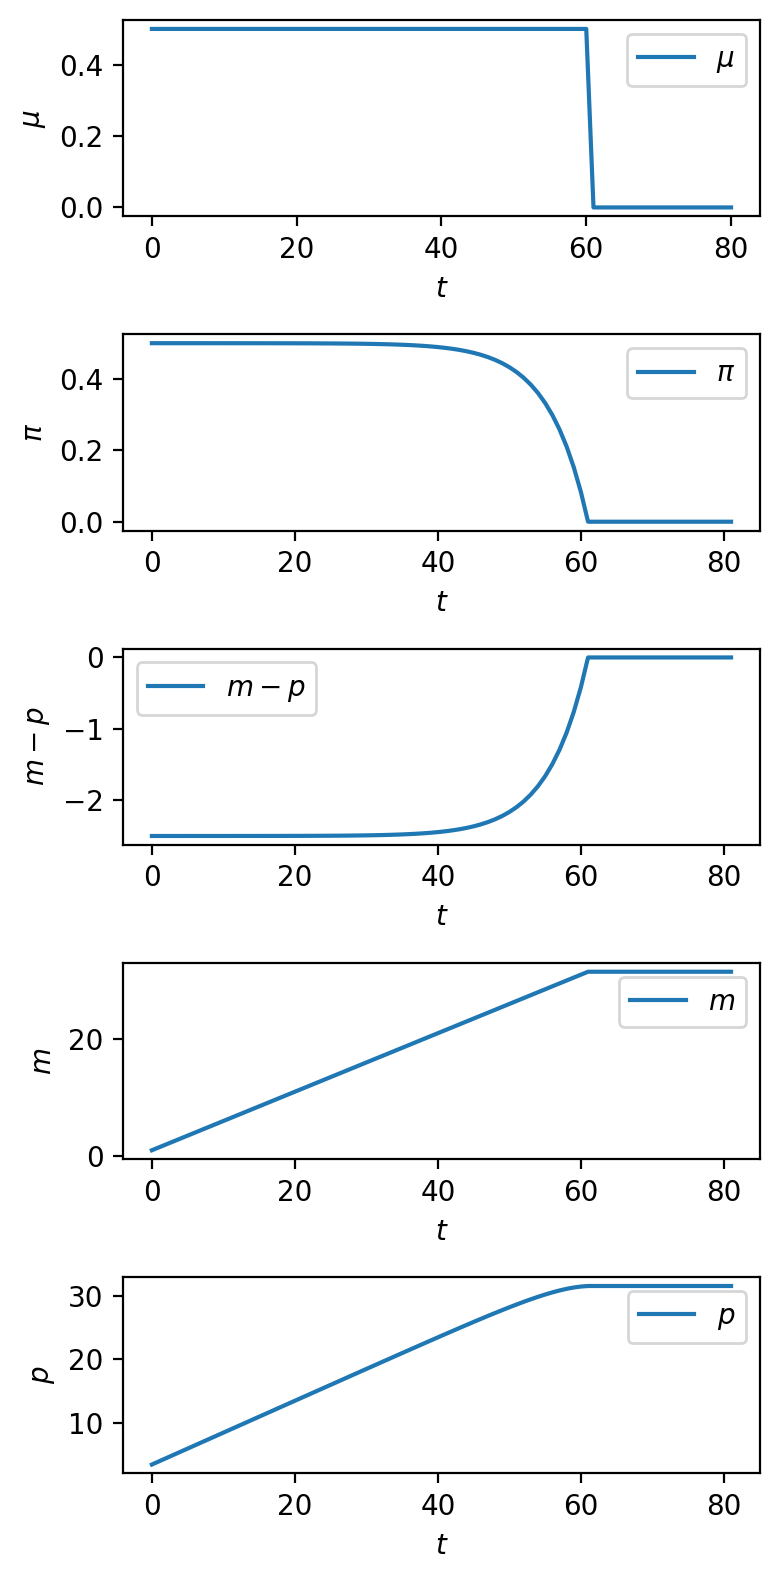

In [8]:
def plot_sequences(sequences, labels):
    _, axs = plt.subplots(len(sequences), 1, figsize=(4, 8), dpi=200)
    for ax, seq, label in zip(axs, sequences, labels):
        ax.plot(range(len(seq)), seq, label=label)
        ax.set_ylabel(label)
        ax.set_xlabel("$t$")
        ax.legend()
    plt.tight_layout()
    plt.show()


sequences = (mu_seq_1, pi_seq_1, m_seq_1 - p_seq_1, m_seq_1, p_seq_1)
plot_sequences(sequences, (r"$\mu$", r"$\pi$", r"$m - p$", r"$m$", r"$p$"))

График темпа роста денежной массы $ \mu_t $ на верхнем графике отображает
резкое снижение с $0.5$ до $0$ в момент времени $T_1 = 60$.

Это приводит к постепенному снижению темпа инфляции $\pi_t$, которое предшествует
снижению темпа роста денежной массы в момент времени $T_1$.

Обратите внимание, как темп инфляции плавно (т.е. непрерывно) снижается до $0$ в момент $T_1$ – в отличие от темпа роста денежной массы, он не «скачет» вниз внезапно в момент $T_1$.

Это связано с тем, что снижение $\mu$ в момент $T_1$ было предсказано с самого начала.

В то время как логарифм денежной массы, изображенный на нижней панели, имеет излом в момент $T_1$, логарифм уровня цен не имеет излома – он «плавный» – опять же, следствие того, что
снижение $\mu$ было предсказано.

### Эксперимент 2: непредвиденная резкая

Откажемся от нашего предположения о «совершенном предвидении», предположив, что внезапное постоянное сокращение $\mu_t$ совершенно *неожиданно*.

Мысленный эксперимент включает переключение в момент времени $T_1$ с первоначальной траектории для $\{\mu_t, \pi_t\}$ на другую, предполагающую постоянно более низкий уровень инфляции.

**Изначальная траектория:** $\mu_t = \mu_0, \forall t \geqslant 0$, то есть имеем последовательность объемов денежной массы $\{\mu_t\}_{t=0}^\infty$; соответствующая траектория инфляции равна $\pi_t = \mu_0$.

**Измененная траектория:** $\mu_0>\mu^*$, $\{\mu_s\}_{s=T_1}^\infty$ строится путем
$\mu_s = \mu^*, \forall s \geqslant T_1$. Траектория совершенного предвидения для $\pi$ --- это $\pi_s = \mu^*$.

Чтобы зафиксировать \<\<совершенно непредвиденный\>\> шок процесса $\{\mu_t\}$ в момент времени $T_1$, мы просто склеиваем $\mu_t, \pi_t$,
полученные на новой траектории $t \geq T_1$, с $\mu_t, \pi_t$, полученными для $t=0, \ldots, T_1 - 1$.

Таким образом, для пути 1 $\pi_t = \mu_0$ для всех $t \in [0, T_1-1]$, тогда как для пути 2 $\mu_s = \mu^*$ для всех $s \geq T_1$.

In [ ]:
# path 1
mu_seq_2_path1 = mu0 * np.ones(T + 1)

cm1 = create_cagan_model(mu_seq=mu_seq_2_path1)
pi_seq_2_path1, m_seq_2_path1, p_seq_2_path1 = solve(cm1, T)

# continuation path
mu_seq_2_cont = mu_star * np.ones(T - T1)

cm2 = create_cagan_model(m0=m_seq_2_path1[T1 + 1], mu_seq=mu_seq_2_cont)
pi_seq_2_cont, m_seq_2_cont1, p_seq_2_cont1 = solve(cm2, T - 1 - T1)


# regime 1 - simply glue pi_seq, mu_seq
mu_seq_2 = np.concatenate((mu_seq_2_path1[: T1 + 1], mu_seq_2_cont))
pi_seq_2 = np.concatenate((pi_seq_2_path1[: T1 + 1], pi_seq_2_cont))
m_seq_2_regime1 = np.concatenate((m_seq_2_path1[: T1 + 1], m_seq_2_cont1))
p_seq_2_regime1 = np.concatenate((p_seq_2_path1[: T1 + 1], p_seq_2_cont1))

# regime 2 - reset m_T1
m_T1 = (m_seq_2_path1[T1] + mu0) + cm2.alpha * (mu0 - mu_star)

cm3 = create_cagan_model(m0=m_T1, mu_seq=mu_seq_2_cont)
pi_seq_2_cont2, m_seq_2_cont2, p_seq_2_cont2 = solve(cm3, T - 1 - T1)

m_seq_2_regime2 = np.concatenate((m_seq_2_path1[: T1 + 1], m_seq_2_cont2))
p_seq_2_regime2 = np.concatenate((p_seq_2_path1[: T1 + 1], p_seq_2_cont2))

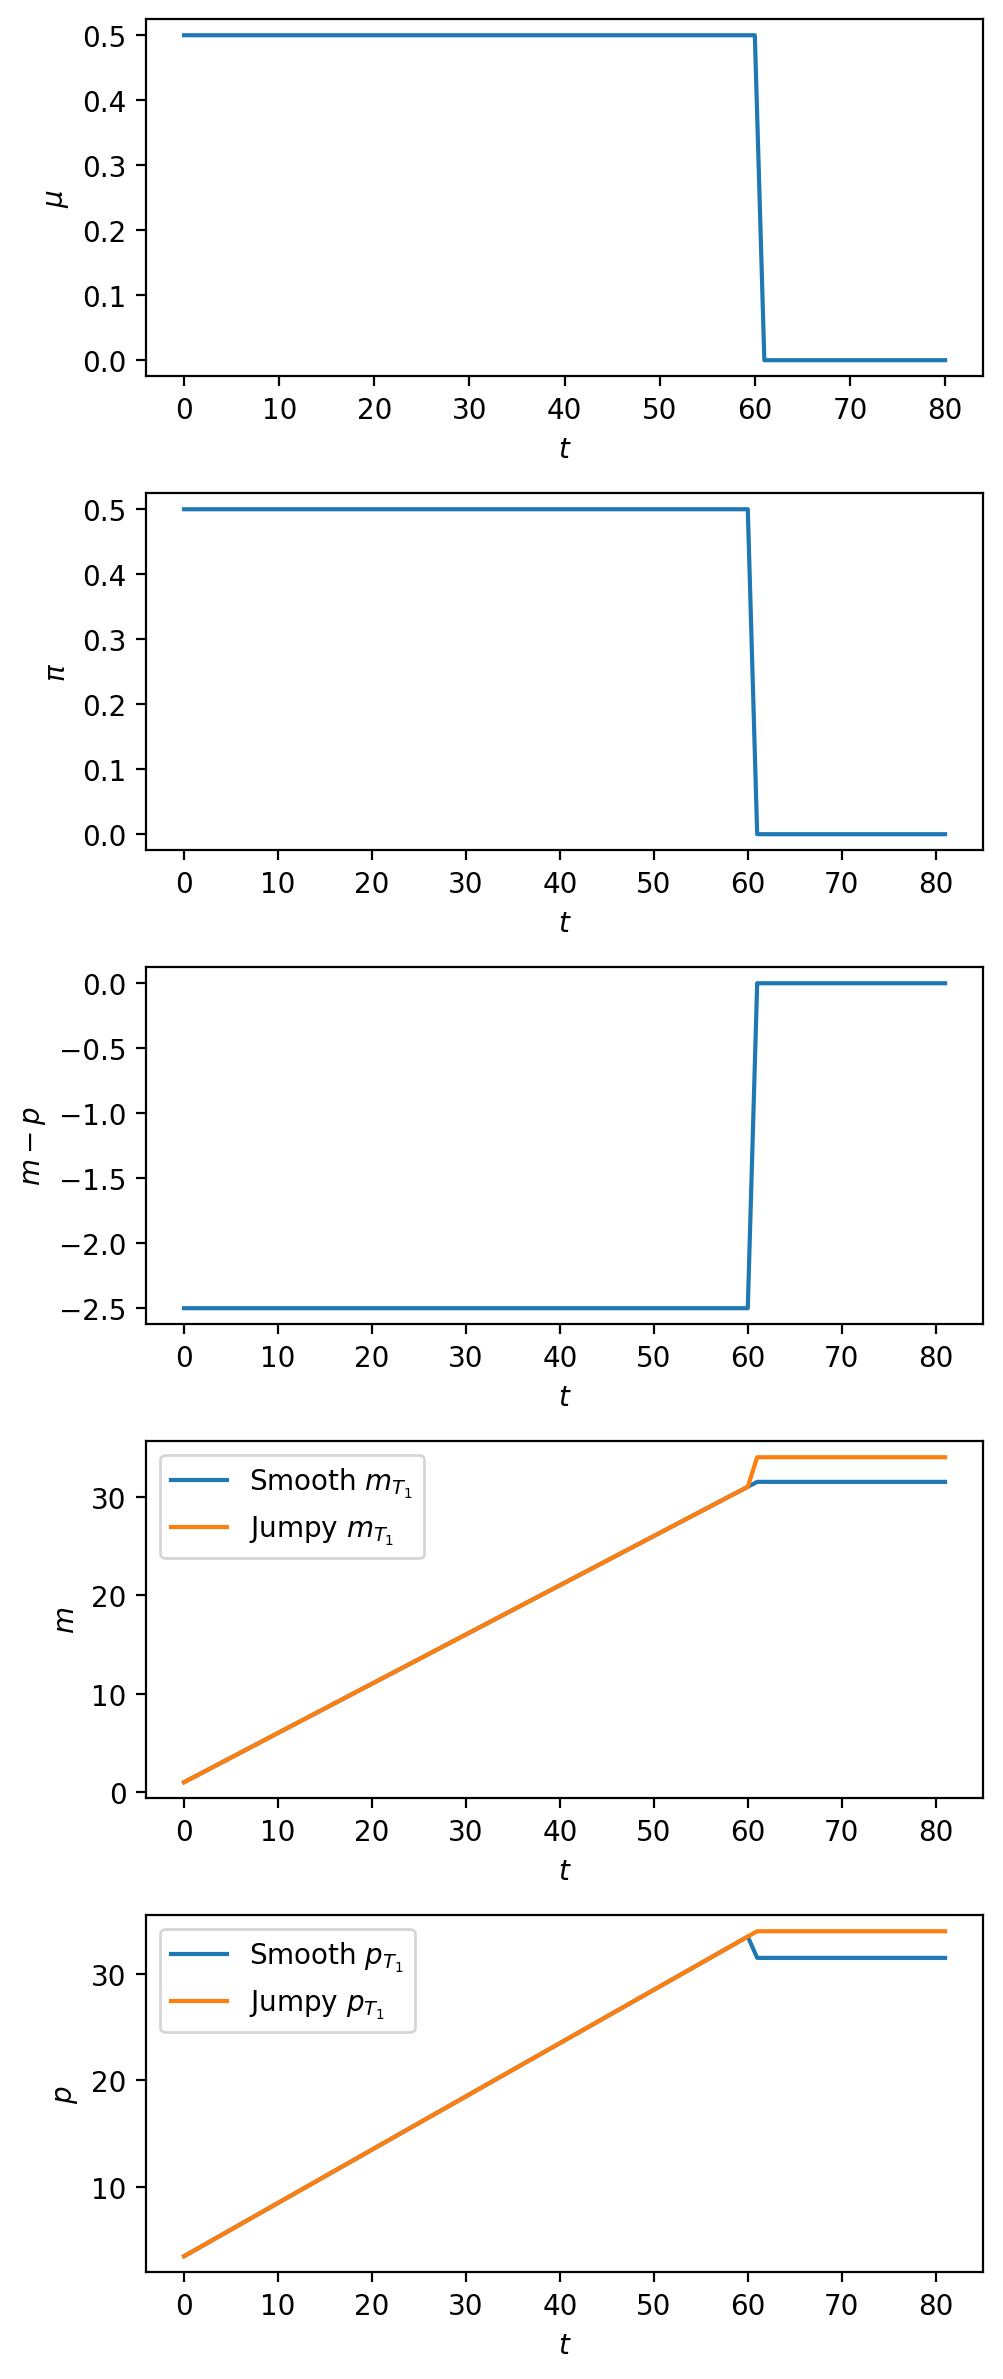

In [ ]:
T_seq = range(T + 2)

# plot both regimes
fig, ax = plt.subplots(5, 1, figsize=(5, 12), dpi=200)

# Configuration for each subplot
plot_configs = [
    {"data": [(T_seq[:-1], mu_seq_2)], "ylabel": r"$\mu$"},
    {"data": [(T_seq, pi_seq_2)], "ylabel": r"$\pi$"},
    {"data": [(T_seq, m_seq_2_regime1 - p_seq_2_regime1)], "ylabel": r"$m - p$"},
    {
        "data": [
            (T_seq, m_seq_2_regime1, "Smooth $m_{T_1}$"),
            (T_seq, m_seq_2_regime2, "Jumpy $m_{T_1}$"),
        ],
        "ylabel": r"$m$",
    },
    {
        "data": [
            (T_seq, p_seq_2_regime1, "Smooth $p_{T_1}$"),
            (T_seq, p_seq_2_regime2, "Jumpy $p_{T_1}$"),
        ],
        "ylabel": r"$p$",
    },
]


def experiment_plot(plot_configs, ax):
    # Loop through each subplot configuration
    for axi, config in zip(ax, plot_configs):
        for data in config["data"]:
            if len(data) == 3:  # Plot with label for legend
                axi.plot(data[0], data[1], label=data[2])
                axi.legend()
            else:  # Plot without label
                axi.plot(data[0], data[1])
        axi.set_ylabel(config["ylabel"])
        axi.set_xlabel(r"$t$")
    plt.tight_layout()
    plt.show()


experiment_plot(plot_configs, ax)

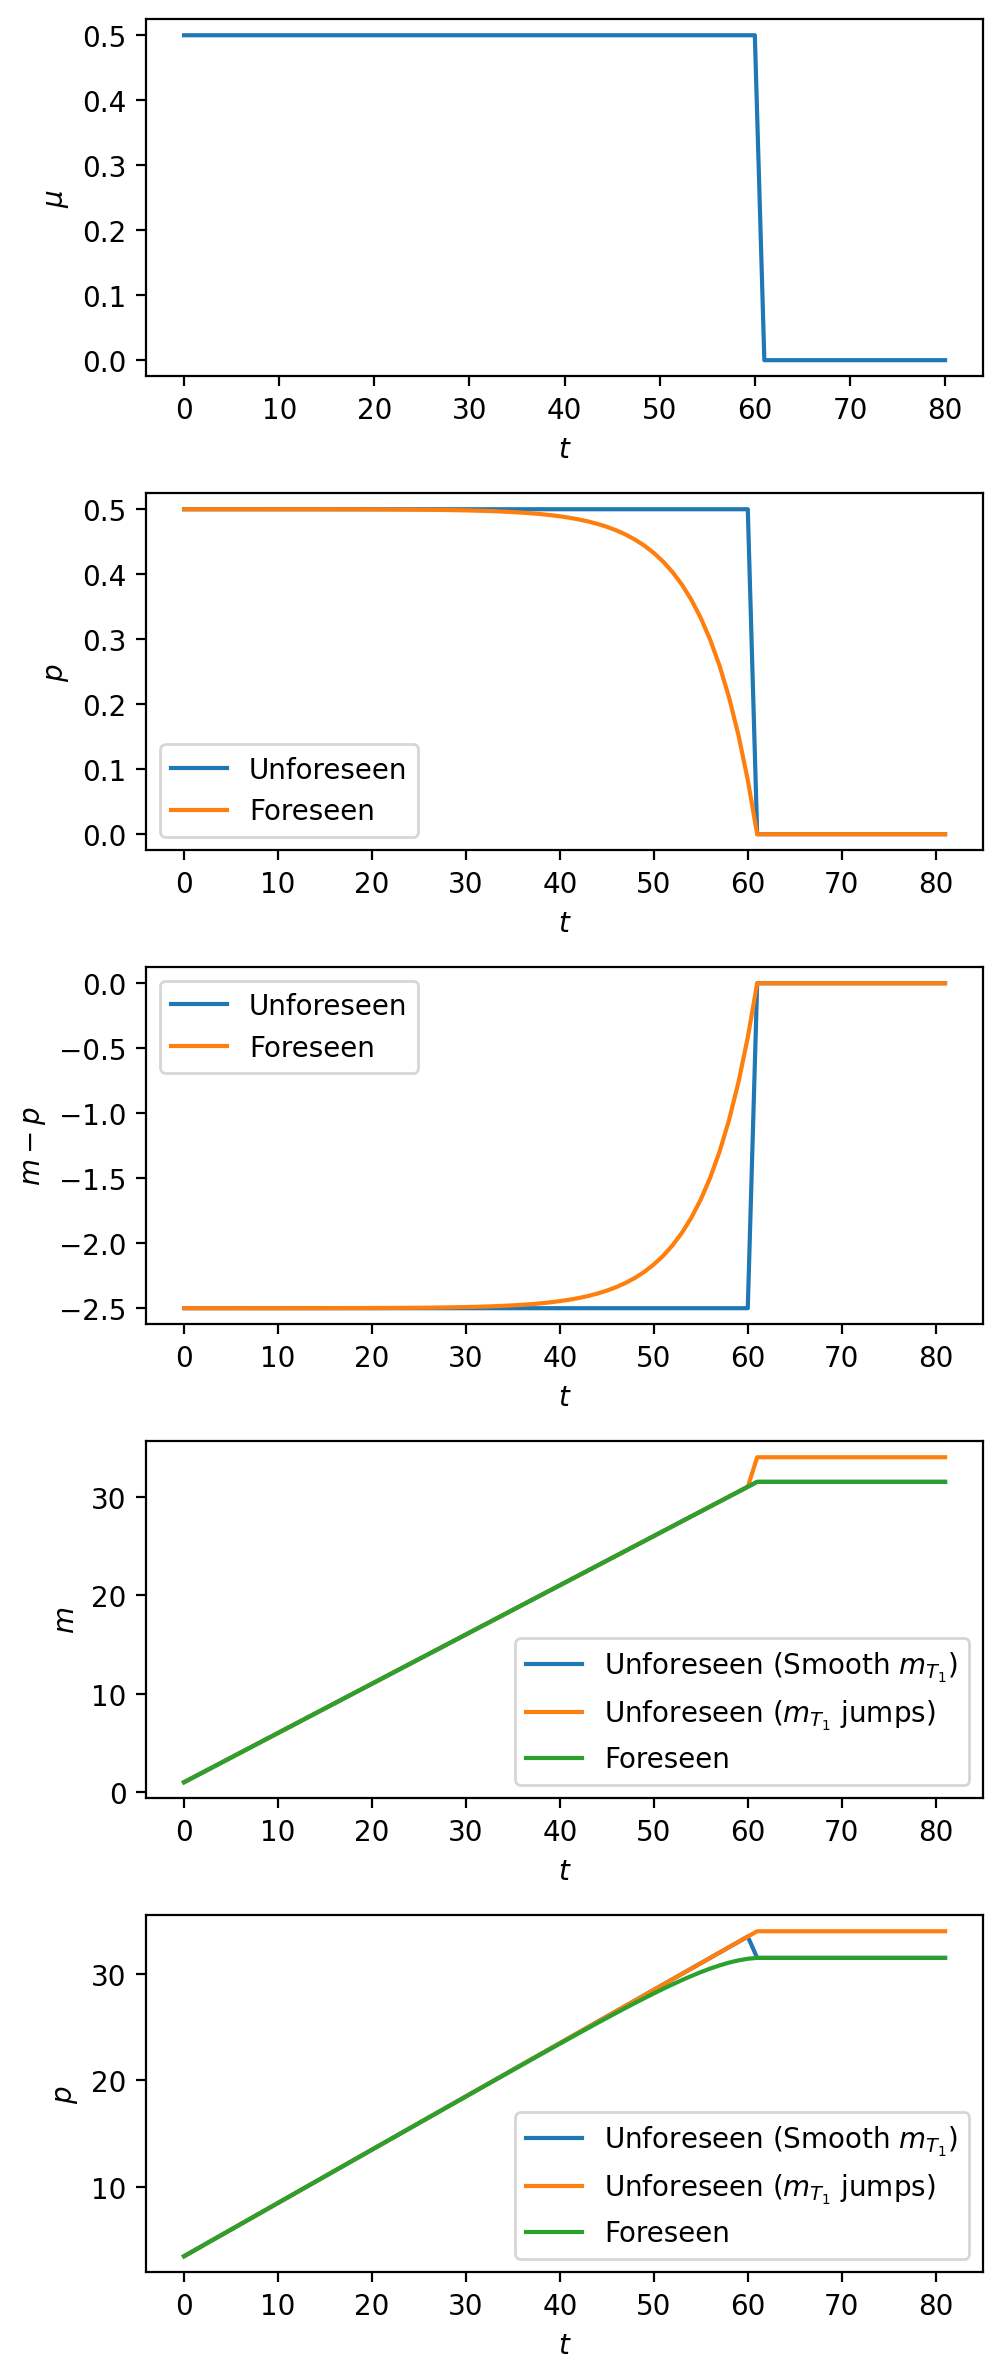

In [ ]:
# compare foreseen vs unforeseen shock
fig, ax = plt.subplots(5, figsize=(5, 12), dpi=200)

plot_configs = [
    {"data": [(T_seq[:-1], mu_seq_2)], "ylabel": r"$\mu$"},
    {
        "data": [(T_seq, pi_seq_2, "Unforeseen"), (T_seq, pi_seq_1, "Foreseen")],
        "ylabel": r"$p$",
    },
    {
        "data": [
            (T_seq, m_seq_2_regime1 - p_seq_2_regime1, "Unforeseen"),
            (T_seq, m_seq_1 - p_seq_1, "Foreseen"),
        ],
        "ylabel": r"$m - p$",
    },
    {
        "data": [
            (T_seq, m_seq_2_regime1, "Unforeseen (Smooth $m_{T_1}$)"),
            (T_seq, m_seq_2_regime2, "Unforeseen ($m_{T_1}$ jumps)"),
            (T_seq, m_seq_1, "Foreseen"),
        ],
        "ylabel": r"$m$",
    },
    {
        "data": [
            (T_seq, p_seq_2_regime1, "Unforeseen (Smooth $m_{T_1}$)"),
            (T_seq, p_seq_2_regime2, "Unforeseen ($m_{T_1}$ jumps)"),
            (T_seq, p_seq_1, "Foreseen"),
        ],
        "ylabel": r"$p$",
    },
]

experiment_plot(plot_configs, ax)